In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sample_data(dataraw,sampling_interval):
    data_sampled = []
    last_sampled_time = 0

    for i in range(0,len(dataraw)):
        if ((dataraw[i,0] >= last_sampled_time + sampling_interval) or i==0):
            if i!=0:
                last_sampled_time = last_sampled_time + sampling_interval # to keep regular intervals

            last_sampled_data = dataraw[i,1]
            data_sampled.append([last_sampled_time,last_sampled_data])
            
    data_sampled = np.asarray(data_sampled)
    return data_sampled

def fft_to_plot(data_sampled,sampling_interval):
    N = len(data_sampled)
    # the fft itself
    fft_data = np.fft.fft(data_sampled)
    freq = np.linspace(0, 0.5*1/sampling_interval, N//2)
    amplitude = 2/N * np.abs(fft_data[:N//2])
    amplitude[0] /=2 # The DC component is not meant to be multiplied by to in the P2 to P1 conversion
    return freq, amplitude


In [2]:
df = pd.read_csv('Draft1base_aplificador_filtro.txt',delimiter='\t')
dataraw = df.to_numpy()

sampling_interval = 2.5

In [3]:
def sample(df, sampling_interval, column):
    temp = df.set_index("time")

    sampled_values = [temp.iloc[0][column]]
    sampled_time   = [temp.index[0]]

    last_sampled_time = sampled_time[-1]

    for index in temp.index:
        if index >= last_sampled_time + sampling_interval:
            sampled_time.append(index)
            
            value = temp.loc[index][column]
            sampled_values.append(value)

            last_sampled_time = index

    return sampled_time, sampled_values

In [4]:
filtered_sample_time, filtered_sample_values = sample(df, sampling_interval, column = "V(vout)")
amp_sample_time, amp_sample_values = sample(df, sampling_interval, column = "V(vouts2)")

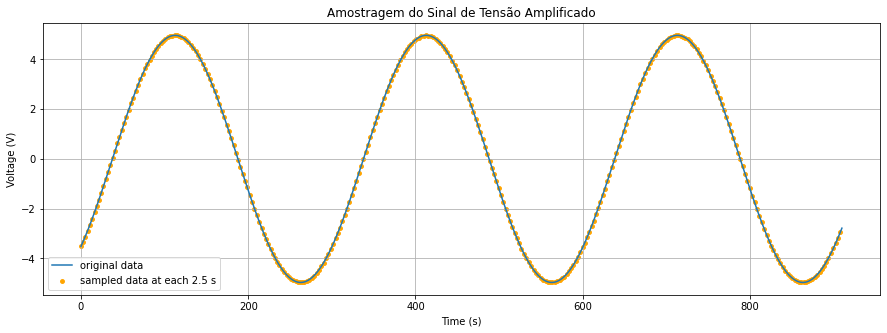

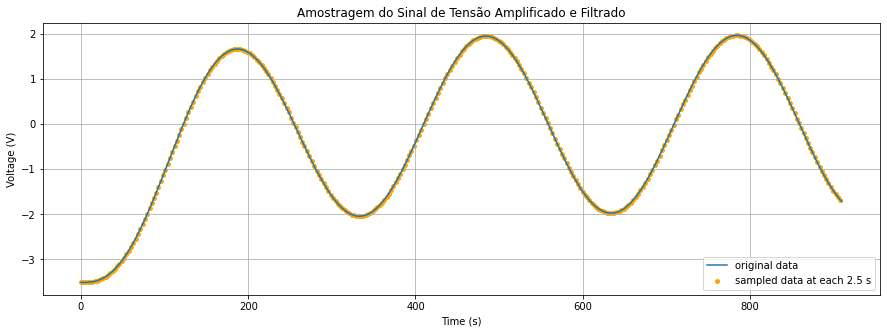

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


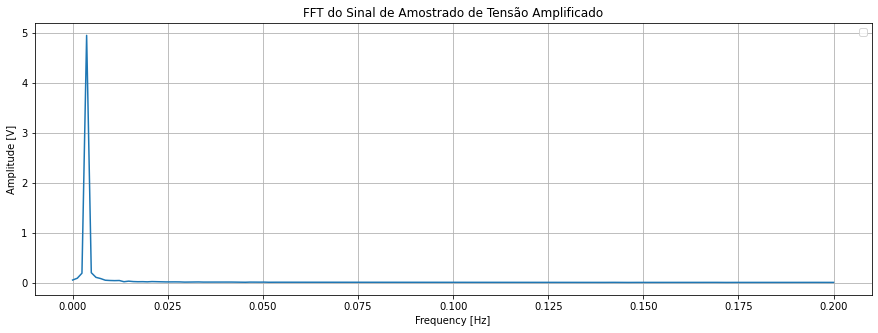

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


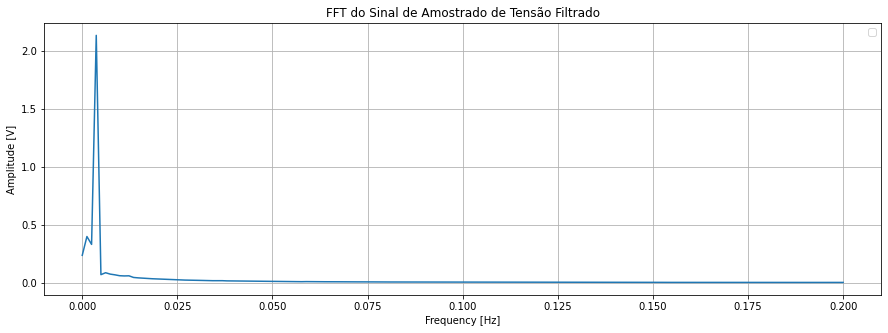

In [5]:
plt.figure(figsize = (15, 5))
plt.plot(dataraw[:,0],dataraw[:,3],label='original data')
plt.scatter(amp_sample_time, amp_sample_values, label='sampled data at each '+str(sampling_interval)+' s', c = 'orange', s = 15)
plt.title('Amostragem do Sinal de Tensão Amplificado')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(dataraw[:,0],dataraw[:,2],label='original data')
plt.scatter(filtered_sample_time, filtered_sample_values, label='sampled data at each '+str(sampling_interval)+' s', c = 'orange', s = 15)
plt.title('Amostragem do Sinal de Tensão Amplificado e Filtrado')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()
plt.show()

freq_amp, amplitude_amp = fft_to_plot(amp_sample_values, sampling_interval)
freq_after, amplitude_after = fft_to_plot(filtered_sample_values, sampling_interval)

plt.figure(figsize = (15, 5))
plt.title('FFT do Sinal de Amostrado de Tensão Amplificado')
plt.plot(freq_amp, amplitude_amp)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize = (15, 5))
plt.title('FFT do Sinal de Amostrado de Tensão Filtrado')
plt.plot(freq_after, amplitude_after)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

In [1]:
(5 + 7 + 8 + 5 + 12)/5

7.4

In [7]:
1/8

0.125

In [11]:
robots = ['r2d2', 'c3po']

for i in robots:

    robots.upper()

print(robots)


AttributeError: 'list' object has no attribute 'upper'